In [77]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# GRAPHICAL EXPLORATION & CLEANING

In [3]:
df = pd.read_csv("GDP_Origin.csv")

In [70]:
# Clean NaN / null values 
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 9 to 735
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cntry              571 non-null    object 
 1   LegEnvt            571 non-null    object 
 2   GeogZone1          571 non-null    object 
 3   IntalCCY           571 non-null    object 
 4   GdpGwth            571 non-null    float64
 5   Year               571 non-null    float64
 6   FxRate             571 non-null    float64
 7   InflatioIndx       571 non-null    float64
 8   OECDSTInterbkRate  571 non-null    float64
 9   M3                 571 non-null    float64
dtypes: float64(6), object(4)
memory usage: 49.1+ KB


In [75]:
df.isnull().sum()
# No more null values

df.isna().sum()
# Same for NaN values

Cntry                0
LegEnvt              0
GeogZone1            0
IntalCCY             0
GdpGwth              0
Year                 0
FxRate               0
InflatioIndx         0
OECDSTInterbkRate    0
M3                   0
dtype: int64

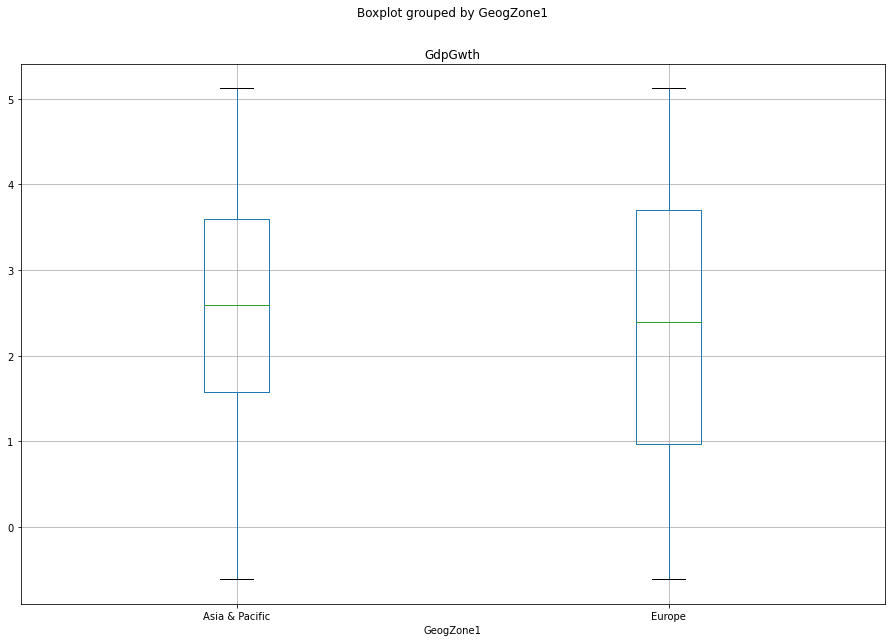

In [76]:
df.boxplot(column='GdpGwth',by='GeogZone1', figsize=(15, 10))
plt.show()

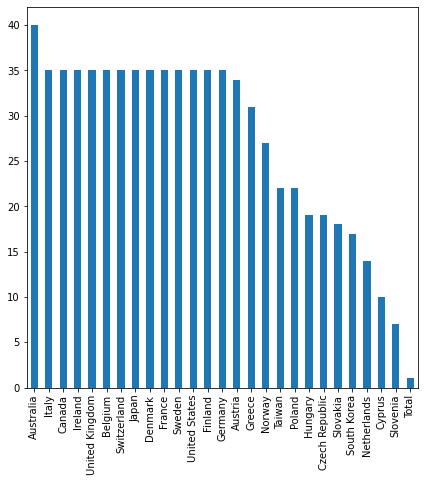

In [10]:
plt.figure(figsize=(7, 7))
df['Cntry'].value_counts().plot.bar()
plt.show()

In [11]:
df['Cntry'].value_counts()

Australia         40
Italy             35
Canada            35
Ireland           35
United Kingdom    35
Belgium           35
Switzerland       35
Japan             35
Denmark           35
France            35
Sweden            35
United States     35
Finland           35
Germany           35
Austria           34
Greece            31
Norway            27
Taiwan            22
Poland            22
Hungary           19
Czech Republic    19
Slovakia          18
South Korea       17
Netherlands       14
Cyprus            10
Slovenia           7
Total              1
Name: Cntry, dtype: int64

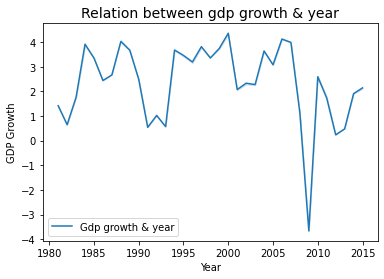

In [14]:
ax = sns.lineplot(x='Year', y='GdpGwth', label='Gdp growth & year',
 data=df, ci=False)
plt.title('Relation between gdp growth & year', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('GDP Growth')
plt.show()

[Text(0, 0.5, 'Gdp growth')]

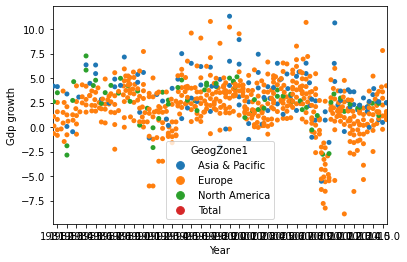

In [19]:
ax = sns.swarmplot(data=df, x="Year", y="GdpGwth", hue="GeogZone1", size=5)
ax.set(ylabel="Gdp growth")

In [71]:
# DATA CALCUL :

# - Central tendency,
# - Dispersion measure of the data set
# - Minimum, Maximum,
# - Frequency table 25%, 50%, 75%
# - Count of observations

df.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3
count,736,735,736,736,571,691
mean,2,"2,000",41,91,4,62
std,4,10,173,22,6,33
min,-9,"1,981",0,16,-2,6
25%,1,"1,992",1,77,1,34
50%,2,"2,001",1,94,3,55
75%,4,"2,008",6,107,5,96
max,100,"2,015","1,314",149,100,147


In [5]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3
count,736,735,736,736,571,691
mean,2,"2,000",41,91,4,62
std,4,10,173,22,6,33
min,-9,"1,981",0,16,-2,6
25%,1,"1,992",1,77,1,34
50%,2,"2,001",1,94,3,55
75%,4,"2,008",6,107,5,96
max,100,"2,015","1,314",149,100,147


In [7]:
import scipy.stats as sp
df_o = pd.DataFrame()
for col in df.columns:
     df_o[col] = sp.mstats.winsorize(df[col], limits=0.1, inplace=True)
        
df_o.describe()


,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3
count,736,736,736,736,571,736
mean,2,"2,000",7,92,4,65
std,2,9,12,18,6,33
min,-1,"1,986",1,61,0,22
25%,1,"1,992",1,77,1,35
50%,2,"2,001",1,94,3,59
75%,4,"2,008",6,107,5,100
max,5,"2,013",36,118,100,117


In [ ]:
sns.swarmplot(data=df_o, x="Cntry", y="Year", hue="GdpGwth", size=5)

In [6]:
df_o.info()

NameError: name 'df_o' is not defined

In [9]:
df_o['year_cat']= pd.cut(x=df['Year'], bins=[0, 1989, 1999, 2009, 2019],
 labels = ["1980-1989", "1990-1999",
 "2000-2009", "2010-2020"])

df_o.head(100)

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,year_cat
0,Austria,Common Wealth,Asia & Pacific,CAD,4,"1,986",1,61,nan,22,1980-1989
1,Austria,Common Wealth,Asia & Pacific,CAD,0,"1,986",1,61,nan,22,1980-1989
2,Austria,Common Wealth,Asia & Pacific,CAD,-0,"1,986",1,61,nan,22,1980-1989
3,Austria,Common Wealth,Asia & Pacific,CAD,5,"1,986",1,61,nan,22,1980-1989
4,Austria,Common Wealth,Asia & Pacific,CAD,5,"1,986",1,61,nan,22,1980-1989
...,...,...,...,...,...,...,...,...,...,...,...
95,Belgium,French Civil Assimilated,Europe,EUR,2,"1,992",1,79,nan,35,1990-1999
96,Belgium,French Civil Assimilated,Europe,EUR,-1,"1,993",1,81,nan,37,1990-1999
97,Belgium,French Civil Assimilated,Europe,EUR,3,"1,994",1,83,5,39,1990-1999
98,Belgium,French Civil Assimilated,Europe,EUR,2,"1,995",1,84,6,40,1990-1999


In [14]:
df_o['GdpGwth_cat']= pd.cut(x=df['GdpGwth'], bins=[-1, 0, 1, 2, 3, 4, 5, 6],
 labels = [-1, 0, 1, 2, 3, 4, 5])

df_o.head()

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,year_cat,GdpGwth_cat
0,Austria,Common Wealth,Asia & Pacific,CAD,4,"1,986",1,61,nan,22,1980-1989,4
1,Austria,Common Wealth,Asia & Pacific,CAD,0,"1,986",1,61,nan,22,1980-1989,0
2,Austria,Common Wealth,Asia & Pacific,CAD,-0,"1,986",1,61,nan,22,1980-1989,-1
3,Austria,Common Wealth,Asia & Pacific,CAD,5,"1,986",1,61,nan,22,1980-1989,5
4,Austria,Common Wealth,Asia & Pacific,CAD,5,"1,986",1,61,nan,22,1980-1989,5


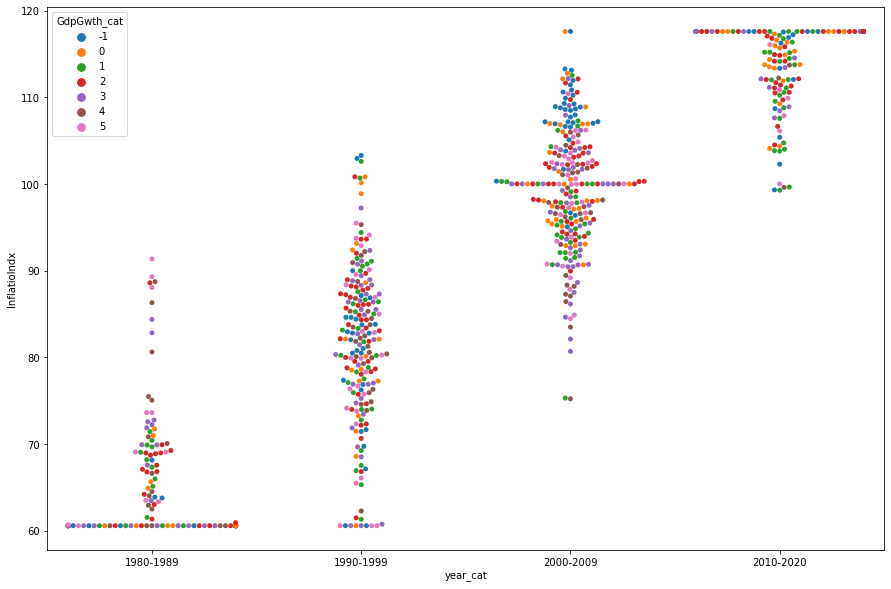

In [20]:
plt.figure(figsize=(15, 10))
sns.swarmplot(x="year_cat", y="InflatioIndx", hue='GdpGwth_cat', data=df_o)
plt.show()

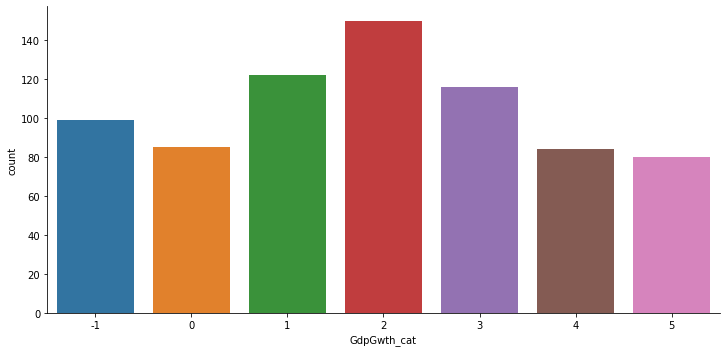

In [23]:
sns.catplot(x="GdpGwth_cat", kind="count", data=df_o, height=5, aspect=2)
plt.show()

In [29]:
# Prediction & Machine learning
df_o.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3
count,736,736,736,736,571,736
mean,2,"2,000",7,92,4,65
std,2,9,12,18,6,33
min,-1,"1,986",1,61,0,22
25%,1,"1,992",1,77,1,35
50%,2,"2,001",1,94,3,59
75%,4,"2,008",6,107,5,100
max,5,"2,013",36,118,100,117


In [32]:
X = df_o[['GdpGwth', 'InflatioIndx', 'FxRate']]
y = df_o['Year']

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [40]:
y_pred = lr.predict(X)

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 1956.7059016769667
Coefficients: 
 [ 0.16869897  0.47402942 -0.03665598]


In [41]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictionsFull = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     2038.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:57:46   Log-Likelihood:                -1841.6
No. Observations:                 736   AIC:                             3691.
Df Residuals:                     732   BIC:                             3710.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1956.7059      0.619   3162.504   

In [46]:
df_o.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3
count,736,736,736,736,571,736
mean,2,"2,000",7,92,4,65
std,2,9,12,18,6,33
min,-1,"1,986",1,61,0,22
25%,1,"1,992",1,77,1,35
50%,2,"2,001",1,94,3,59
75%,4,"2,008",6,107,5,100
max,5,"2,013",36,118,100,117


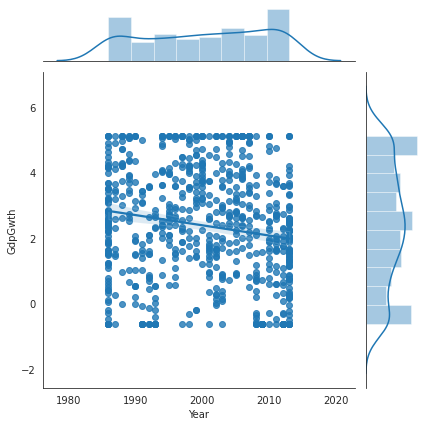

In [52]:
with sns.axes_style ('white'):
    sns.jointplot('Year','GdpGwth', data=df_o,kind='reg')

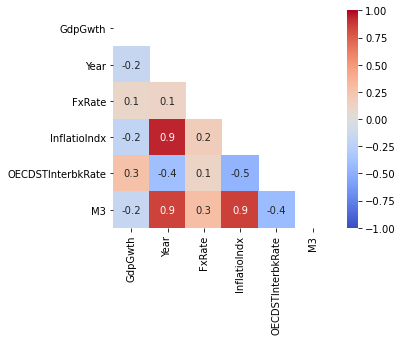

In [54]:
import numpy as np
matrix = np.triu(df_o.corr())
sns.heatmap(df_o.corr(), annot= True, fmt='.1g',vmin=-1, vmax=1,center=0,cmap='coolwarm',
 square=True, mask=matrix)


In [59]:
mask = np.random.rand(len(df)) < 0.8
train = df_o[mask]
test = df_o[~mask]

# Useless

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(588, 4) (588,)
(148, 4) (148,)


In [61]:
# Fit train
Lr_train = LinearRegression()
Lr_train.fit(X_train[['GdpGwth', 'InflatioIndx', 'FxRate']], y_train)
y_predicted_train = Lr_train.predict(
 X_train[['GdpGwth', 'InflatioIndx', 'FxRate']])

In [62]:
print('Intercept: \n', Lr_train.intercept_)
print('Coefficients: \n', Lr_train.coef_)

Intercept: 
 1956.4214910049477
Coefficients: 
 [ 0.22433733  0.47556352 -0.03986117]


In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2_train = r2_score(y_train, y_predicted_train)
RMSE_Train = np.sqrt(mean_squared_error(y_train, y_predicted_train))
print ('R2 Train :', R2_train)
print ('RMSE Train :', RMSE_Train)

R2 Train : 0.8926213372739984
RMSE Train : 2.9424553574213896


In [64]:
Lr_test = LinearRegression()
y_predicted_test = Lr_train.predict(
 X_test[['GdpGwth', 'InflatioIndx', 'FxRate']])

In [65]:
Lr_test.fit(X_test[['GdpGwth', 'InflatioIndx', 'FxRate']], y_test)
print('Intercept:\n', Lr_test.intercept_)
print('Coefficients:\n', Lr_test.coef_)

Intercept:
 1957.7138365546182
Coefficients:
 [-0.04519525  0.46888218 -0.03052904]


In [66]:
R2_test = r2_score(y_test, y_predicted_test)
RMSE_Test = np.sqrt(mean_squared_error(y_test, y_predicted_test))
print ('R2 Train :', R2_train)
print ('RMSE Train :', RMSE_Train)

R2 Train : 0.8926213372739984
RMSE Train : 2.9424553574213896
